# EFRCourierReadOnly Report

set path

In [79]:
fig_path = '/home1/noaherz/EFRCourier_Analysis/figures'
# fig_path = '/home1/noaherz/EFRCourier_Analysis/figures/OpenLoop'


In [80]:
import cmlreaders as cml
import matplotlib.pyplot as plt
# from ptsa.data.filters import ButterworthFilter
# from ptsa.data.filters import MorletWaveletFilter
# import xarray as xr
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from eeg_check import eeg_check,plot_eeg_check_jlab,erp_sme

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pandas_to_pybeh as pb
# import pybeh_pd as pb


import sys
sys.path.append('/home1/noaherz/pybeh_pd')
import pybeh_pd as pb

# from pandas_to_pybeh import *
import seaborn as sns
import os,sys,argparse,glob

import json
from  matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', 1000)
import warnings
warnings.filterwarnings("ignore")

In [82]:
# add 'phase' column to events df (with 'encoding', 'retrieval' for FR, FFR (final FR) or FSR (final store recall))
def add_phase(evs):
    new_evs = pd.DataFrame([])
    for ind,list_evs in evs.groupby('trial'): # 'trial' is the aquivalent of a delivery day
        
#         if list_evs['trial'].unique() >= 0:
#             list_evs['phase']='nan'
            
        try:
            # find indexes of encoding start and end
            first_pointing_index = min(list_evs[list_evs['type']=='pointing begins'].index)
            navigation_end_index = min(list_evs[list_evs['type']=='TRIAL_END'].index)-1
            list_evs.loc[first_pointing_index:navigation_end_index]['phase']='encoding'

            # find indexes of retrieval start and end
            rec_start_index = list_evs[list_evs['type']=='REC_START'].index[0]
            rec_end_index = list_evs[list_evs['type']=='REC_STOP'].index[0]
            list_evs.loc[rec_start_index:rec_end_index]['phase']='retrieval'

            if len(list_evs[list_evs.type=='FSR_START'])>0: # relevant only for the final trial
                # find indexes of Final FR for stores start and end
                FSR_start_index = list_evs[list_evs['type']=='FSR_START'].index[0]
                FSR_end_index = list_evs[list_evs['type']=='FSR_STOP'].index[0]
                list_evs.loc[FSR_start_index:FSR_end_index]['phase']='FSR'

                 # find indexes of Final FR for items start and end
                FFR_start_index = list_evs[list_evs['type']=='FFR_START'].index[0]
                FFR_end_index = list_evs[list_evs['type']=='FFR_STOP'].index[0]
                list_evs.loc[FFR_start_index:FFR_end_index]['phase']='FFR'
        except:
            pass
#         elif list_evs['trial'].unique()==-999:
#             list_evs['phase']='nan'
            

        new_evs=pd.concat([new_evs,list_evs])

    return new_evs

In [83]:
# exp = 'EFRCourierReadOnly'
# exp='EFRCourierOpenLoop'
exp = 'DBOY1'

In [84]:
whole_df = cml.CMLReader.get_data_index() 
exp_df = whole_df.query('experiment == @exp')
print('number of subjects in ', exp, len(exp_df['subject'].unique()))
print('number of sessions in ',exp, len(exp_df))

# sub_df_exp = 'EFRCourierOpenLoop'#'EFRCourierOpenLoop'
# sub_df = whole_df.query('experiment == @sub_df_exp')
# print('number of subjects in EFRCourierOpenLoop:', len(sub_df['subject'].unique()))
# print('number of sessions in EFRCourierOpenLoop:', len(sub_df))


number of subjects in  DBOY1 44
number of sessions in  DBOY1 91


In [9]:
whole_df['experiment'].unique()

array(['ltpFR', 'ltpFR2', 'VFFR', 'ltpRepFR', 'NiclsCourierClosedLoop',
       'NiclsCourierReadOnly', 'ltpDelayRepFRReadOnly', 'ltpDBOY1',
       'prelim', 'EFRCourierOpenLoop', 'EFRCourierReadOnly', 'FR1', 'FR2',
       'PAL1', 'YC1', 'PAL2', 'catFR1', 'YC2', 'catFR2', 'PS1', 'PS3',
       'PS2', 'TH1', 'FR3', 'PS2.1', 'PAL3', 'TH3', 'OPS', 'RepFR1',
       'catFR3', 'FR5', 'PS4_catFR', 'THR', 'PS4_FR', 'PAL5', 'THR1',
       'catFR5', 'PS4_catFR5', 'FR6', 'PS5_catFR', 'catFR6', 'TICL_FR',
       'LocationSearch', 'TICL_catFR', 'DBOY1', 'CatFR6', 'RepFR2',
       'pyFR'], dtype=object)

In [85]:
# temporary - fix loading Freiburg subjects
exp_df=exp_df[exp_df['subject']!='FBG490']

In [86]:
# Prefix FR defaults to pyFR experiments while loading through CMLReaders, 
# so from now on all freiburg subjects will have FBG as their prefixes.

if exp == 'EFRCourierOpenLoop' :
    exp_df=exp_df.drop([0,1,2,3])
    exp_df

In [87]:
full_evs=pd.DataFrame([])
for ind,row in exp_df.iterrows():
    reader = cml.CMLReader(subject=row['subject'], experiment=exp, session=row['session'])
    evs = reader.load('task_events')
    all_evs = add_phase(evs)
    full_evs=full_evs.append(all_evs)
#     print(str(sum(full_evs['trial'].unique()>=0))+' delivery days')
print(full_evs['subject'].unique())

['R1494D' 'R1501J' 'R1502D' 'R1503E' 'R1504E' 'R1509E' 'R1513D' 'R1520T'
 'R1521E' 'R1523E' 'R1524T' 'R1526J' 'R1529T' 'R1530J' 'R1532T' 'R1533J'
 'R1535E' 'R1536J' 'R1537T' 'R1538E' 'R1539E' 'R1542J' 'R1543E' 'R1544E'
 'R1546E' 'R1549E' 'R1551T' 'R1552E' 'R1553E' 'R1554T' 'R1556J' 'R1560T'
 'R1561E' 'R1564J' 'R1565T' 'R1567T' 'R1569T' 'R1570T' 'R1571T' 'R1572T'
 'R1573T' 'R1575E' 'R1585E' 'R1598E']


In [16]:
# def phase_time(full_evs,type_start,type_end):
#     ''' compute the time it took subjects to complete a given phase of the task.
#     e.g. town_learning_times = phase_time(full_evs,'TL_START','TL_END')
#  will yield the time (in minutes) it took subjects to complete the town learning phase.'''
#     times = []
#     for i, sub_data in full_evs.groupby('subject'):
#         try:
#             if type_start == 'REC_STOP': # for cued recall phase
#                 index_start = min(sub_data[sub_data['type']=='CUED_REC_CUE'].index)
#                 index_end = max(sub_data[sub_data['type']=='CUED_REC_STOP'].index)
#                 times.extend(sub_data.loc[index_end]['mstime'] - sub_data.loc[index_start]['mstime'])
#             else:
#                 times.extend(np.array(sub_data[sub_data['type']==type_end]['mstime']) - np.array(sub_data[sub_data['type']==REC_STOP]['mstime']))
#         except:
#             pass
#     return np.array(times)/1000/60 # convert ms to minutes


In [88]:
def phase_time(full_evs,type_start,type_end):
    ''' compute the time it took subjects to complete a given phase of the task.
    e.g. town_learning_times = phase_time(full_evs,'TL_START','TL_END')
 will yield the time (in minutes) it took subjects to complete the town learning phase.'''
    times = []
    df = pd.DataFrame([])
    for i, sub_data in full_evs.groupby(['subject','session']):
        start_ind=sub_data[sub_data['type']==type_start]['mstime']
        end_ind = sub_data[sub_data['type']==type_end]['mstime']
        if len(start_ind)==len(end_ind):
            sub_times = np.array(sub_data[sub_data['type']==type_end]['mstime']) - np.array(sub_data[sub_data['type']==type_start]['mstime'])
            times.extend(sub_times)
        elif len(start_ind)==len(end_ind)+1:
            start_ind = start_ind[:-1] # remove incomplete trial
            sub_times=np.array(end_ind) - np.array(start_ind)
            times.extend(sub_times)
        df = df.append({'subject':sub_data['subject'].unique()[0],
                       'session':sub_data['session'].unique()[0],
                       'times':np.round(sub_times/1000/60)},ignore_index = True)
    return np.array(times)/1000/60,df # convert ms to minutes


In [102]:
#for DBOY1 encoding phase:
# phase_minutes = phase_time(full_evs,'TRIAL_START','TRIAL_END')
times = []
df = pd.DataFrame([])
# start_val = []
for i, sub_data in full_evs.groupby(['subject','session','trial']):
    if any(sub_data['type']=='pointing begins'):
        start_ind=min(sub_data[sub_data['type']=='pointing begins'].index)
        start_val=sub_data.loc[start_ind]['mstime']
        end_ind = sub_data[sub_data['type']=='REC_START']['mstime']
#         if len(start_val)==len(end_ind):
        sub_times=np.array(end_ind) - np.array(start_val)
        times.extend(np.round(sub_times/1000/60))
        df = df.append({'subject':sub_data['subject'].unique()[0],
                       'session':sub_data['session'].unique()[0],'trial':sub_data['trial'].unique()[0],
                       'times':np.round(sub_times/1000/60)},ignore_index = True)

df
times        # DBOY1: start: 'store mappings'; end: 'REC_START'

[11.0,
 9.0,
 10.0,
 9.0,
 7.0,
 9.0,
 9.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 13.0,
 9.0,
 10.0,
 9.0,
 9.0,
 8.0,
 7.0,
 7.0,
 9.0,
 7.0,
 8.0,
 6.0,
 11.0,
 8.0,
 7.0,
 9.0,
 7.0,
 9.0,
 9.0,
 8.0,
 7.0,
 8.0,
 8.0,
 8.0,
 10.0,
 14.0,
 12.0,
 11.0,
 13.0,
 11.0,
 16.0,
 10.0,
 10.0,
 9.0,
 9.0,
 9.0,
 8.0,
 8.0,
 9.0,
 13.0,
 16.0,
 9.0,
 9.0,
 10.0,
 14.0,
 8.0,
 11.0,
 8.0,
 9.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.0,
 7.0,
 7.0,
 14.0,
 12.0,
 10.0,
 7.0,
 7.0,
 7.0,
 8.0,
 6.0,
 7.0,
 6.0,
 5.0,
 5.0,
 6.0,
 7.0,
 5.0,
 6.0,
 8.0,
 7.0,
 8.0,
 6.0,
 9.0,
 6.0,
 7.0,
 8.0,
 8.0,
 10.0,
 6.0,
 9.0,
 8.0,
 10.0,
 10.0,
 8.0,
 9.0,
 7.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 10.0,
 8.0,
 8.0,
 7.0,
 6.0,
 8.0,
 6.0,
 7.0,
 10.0,
 10.0,
 7.0,
 8.0,
 8.0,
 8.0,
 10.0,
 17.0,
 12.0,
 15.0,
 13.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.0,
 7.0,
 6.0,
 6.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 8.0,
 10.0,
 8.0,
 8.0,
 9.0,
 8.0,
 18.0,
 12.0,
 18.0,
 11.0,
 22.0,
 14.0,
 15.0,
 13.0

In [108]:
# end_ind
phase_minutes = times
len(phase_minutes)
len(df['subject'].unique())
df

,session,subject,times,trial
0,0.0,R1494D,[11.0],0.0
1,0.0,R1494D,[9.0],1.0
2,0.0,R1494D,[10.0],2.0
3,0.0,R1494D,[9.0],3.0
4,0.0,R1494D,[7.0],4.0
...,...,...,...,...
267,0.0,R1573T,[],2.0
268,0.0,R1575E,[9.0],0.0
269,0.0,R1575E,[9.0],1.0
270,0.0,R1585E,[8.0],0.0


In [18]:
# temp_sub=full_evs[full_evs['subject']=='R1663E']
# start_ind=sub_data[sub_data['type']=='TRIAL_START']['mstime']
# end_ind = sub_data[sub_data['type']=='TRIAL_END']['mstime']
# start_ind
# end_ind
# sub_times = np.array(sub_data[sub_data['type']=='TRIAL_END']['mstime']) - np.array(sub_data[sub_data['type']=='TRIAL_START']['mstime'])
# sub_times/1000/60
# start_ind.index


NameError: name 'sub_data' is not defined

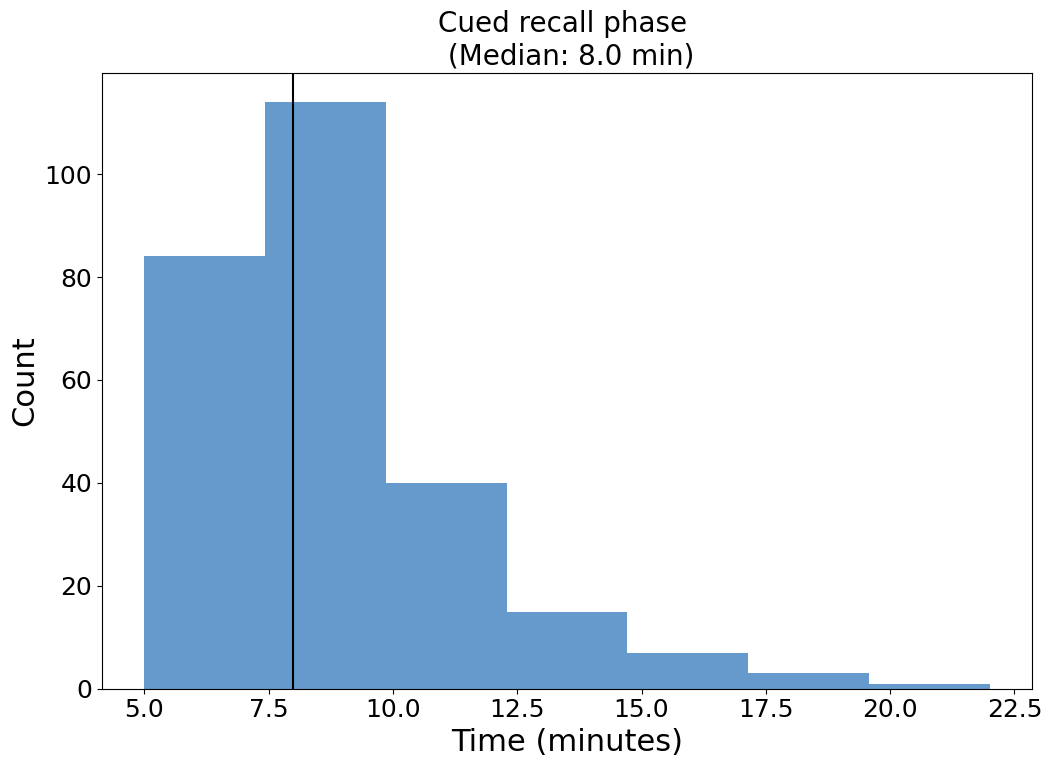

In [105]:
## town learning
# phase_minutes = phase_time(full_evs,'TL_START','TL_END')

## PRACTICE_DELIVERY_START:PRACTICE_DELIVERY_END
# phase_minutes = phase_time(full_evs,'PRACTICE_DELIVERY_START','PRACTICE_DELIVERY_END')

# Encoding phase
# phase_minutes = phase_time(full_evs,'TRIAL_START','TRIAL_END')

## (Externalized) Free recall phase (should always be 1.5 minutes...)
# phase_minutes = phase_time(full_evs,'REC_START','REC_STOP')

# ## length of cued-recall phase (WRONG)
# phase_minutes = phase_time(full_evs,'REC_STOP','TRIAL_START')

median = np.median(phase_minutes)
median = float("{0:.2f}".format(median))
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(phase_minutes, color=(0.4,0.6,0.8),bins=7)
plt.axvline(np.median(phase_minutes), color="k")
plt.title("Cued recall phase \n (Median: {} min)".format(median), fontsize=20)
plt.xlabel("Time (minutes)", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# ax.spines.top.set_visible(False)
# ax.spines.right.set_visible(False)

# plt.savefig(f"{fig_path}/cued_recall_phase_time_dist.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

# make ticks larger
plt.show()

In [18]:
# extract phase time per delivery day
times = []
times_df = pd.DataFrame([])
for i, sub_data in full_evs.groupby(['subject','session','trial']):
    sub_data
    start_ind=sub_data[sub_data['type']=='TRIAL_START']['mstime']
    end_ind = sub_data[sub_data['type']=='TRIAL_END']['mstime']
    if len(start_ind)==len(end_ind):
        time = np.array(sub_data[sub_data['type']=='TRIAL_END']['mstime']) - np.array(sub_data[sub_data['type']=='TRIAL_START']['mstime'])
        times.extend(time)
    elif len(start_ind)==len(end_ind)+1:
        start_ind = start_ind[:-1] # remove incomplete trial
        np.array(start_ind) - np.array(end_ind)
    times_df = times_df.append({'subject':sub_data['subject'].unique()[0],'session':sub_data['session'].unique()[0],
                   'trial':sub_data['trial'].unique()[0],'time':time},ignore_index=True)
times_df

,session,subject,time,trial
0,0.0,R1620J,[],-999.0
1,0.0,R1620J,[],-1.0
2,0.0,R1620J,[744223],0.0
3,0.0,R1620J,[553305],1.0
4,1.0,R1620J,[],-999.0
...,...,...,...,...
74,1.0,R1653J,[367128],4.0
75,0.0,R1663E,[],-999.0
76,0.0,R1663E,[],-1.0
77,0.0,R1663E,[741785],0.0


In [16]:
## Calculate time of each task phase
number_deliveris = [];mean_time = []
for i,sub_data in times_df.groupby('subject'):
    number_deliveris.append(len(sub_data[sub_data['trial']>=0]))
    mean_time.append(np.mean(sub_data[sub_data['trial']>=0]['time'])[0])
mean_time

[477395.70588235295,
 455554.75,
 406479.6666666667,
 639944.5,
 500597.7,
 418294.55555555556,
 376055.5]

r =  0.4540158364098382  p=  0.30615698315206397


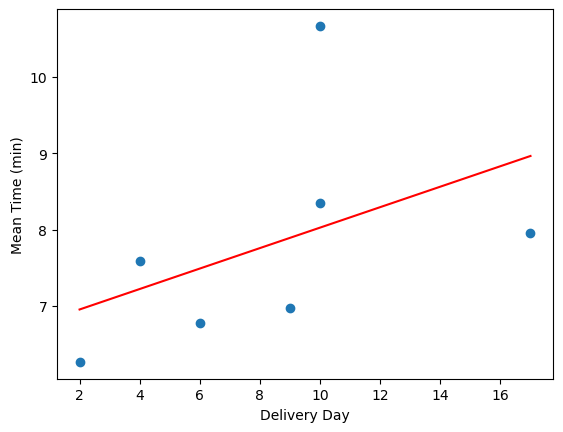

In [21]:
# plot correlation
from scipy import stats
r, p= stats.pearsonr(number_deliveris, mean_time_min)

print('r = ',r,' p= ', p)
mean_time_min  = np.array(mean_time)/1000/60
plt.scatter(number_deliveris, mean_time_min)

# This will fit the best line into the graph
plt.plot(np.unique(number_deliveris), np.poly1d(np.polyfit(number_deliveris, mean_time_min, 1))
         (np.unique(number_deliveris)), color='red')
# Labelling axes
plt.xlabel('Delivery Day')
plt.ylabel('Mean Time (min)')
plt.show()


Count number of DDs

In [17]:
# sub_data=full_evs.groupby('subject').nunique()
# number_trials = sub_data[['session','trial']]
number_trials = full_evs[['session','trial']]

# number_trials['trial']=number_trials['trial']-1 # to exclude -999 trial
number_trials


corrected_trials=pd.DataFrame([])
for i,sub_data in full_evs.groupby(['subject','session']):
    trials=sub_data['trial'].unique()
    trials=trials[trials!=-999]
    trials = len(trials[trials>=0])
    corrected_trials = corrected_trials.append({'subject':sub_data['subject'].unique()[0],'session':sub_data['session'].unique()[0],
                                                'number_DDs':trials},ignore_index=True)
# number_trials['correct_num_trials']=corrected_trials
# corrected_trials.groupby('subject').count()
corrected_trials

,number_DDs,session,subject
0,2.0,0.0,R1620J
1,5.0,1.0,R1620J
2,5.0,2.0,R1620J
3,5.0,5.0,R1620J
4,4.0,1.0,R1633J
5,1.0,0.0,R1637T
6,5.0,1.0,R1637T
7,3.0,0.0,R1642J
8,2.0,2.0,R1642J
9,5.0,3.0,R1642J


In [11]:
# sum_trials_df
number_sessions=corrected_trials.groupby('subject').count()
number_dds= corrected_trials.groupby('subject').sum()
number_dds['session']=number_sessions['session']
number_dds

,number_DDs,session
subject,,
R1620J,17.0,4
R1633J,4.0,1
R1637T,6.0,2
R1642J,10.0,3
R1651J,10.0,3
R1653J,9.0,2
R1663E,2.0,1


In [24]:
# sanity check
full_evs[full_evs['subject']=='R1637T']['trial'].unique()

array([], dtype=int64)

# Behavioural Data

## Navigation 

In [25]:
full_evs.query('type == "WORD"')

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,montage,msoffset,mstime,phase,presX,presZ,protocol,recalled,rectime,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
6,171803,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,0,0,-999,ASPIRIN,-999,0,-1,1654633396181,encoding,-999,-999,r1,1,-999,1,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pharmacy,-3.070312,-58.500000,R1620J,-999.0,0,WORD
9,191815,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,0,0,-999,FLUORIDE,-999,0,-1,1654633416193,encoding,-999,-999,r1,0,-999,2,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",dentist,-29.562500,-37.250000,R1620J,-999.0,0,WORD
12,235867,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,0,0,-999,AMPLIFIER,-999,0,-1,1654633460245,encoding,-999,-999,r1,0,-999,3,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",music_store,32.187500,-60.906250,R1620J,-999.0,0,WORD
15,259491,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,0,1,-999,EMERALD,-999,0,-1,1654633483869,encoding,-999,-999,r1,1,-999,4,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",jewelry_store,59.281250,-9.156250,R1620J,-999.0,0,WORD
19,283892,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,0,0,-999,HAM,-999,0,-1,1654633508270,encoding,-999,-999,r1,1,-999,5,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",grocery_store,-9.093750,17.859375,R1620J,-999.0,0,WORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,3486823,-999.0,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,0,0,-999,MOZZARELLA,-999,0,-1,1654728643811,encoding,-999,-999,r1,0,-999,8,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pizzeria,35.406250,-33.125000,R1620J,-999.0,4,WORD
618,3510856,-999.0,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,0,0,-999,OINTMENT,-999,0,-1,1654728667844,encoding,-999,-999,r1,1,-999,9,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pharmacy,-3.070312,-58.500000,R1620J,-999.0,4,WORD
622,3531667,-999.0,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,0,0,-999,PASTELS,-999,0,-1,1654728688655,encoding,-999,-999,r1,0,-999,10,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",craft_shop,14.546875,-58.781250,R1620J,-999.0,4,WORD
626,3577109,-999.0,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,0,0,-999,TOWELS,-999,0,-1,1654728734097,encoding,-999,-999,r1,0,-999,11,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",barber_shop,36.750000,59.062500,R1620J,-999.0,4,WORD


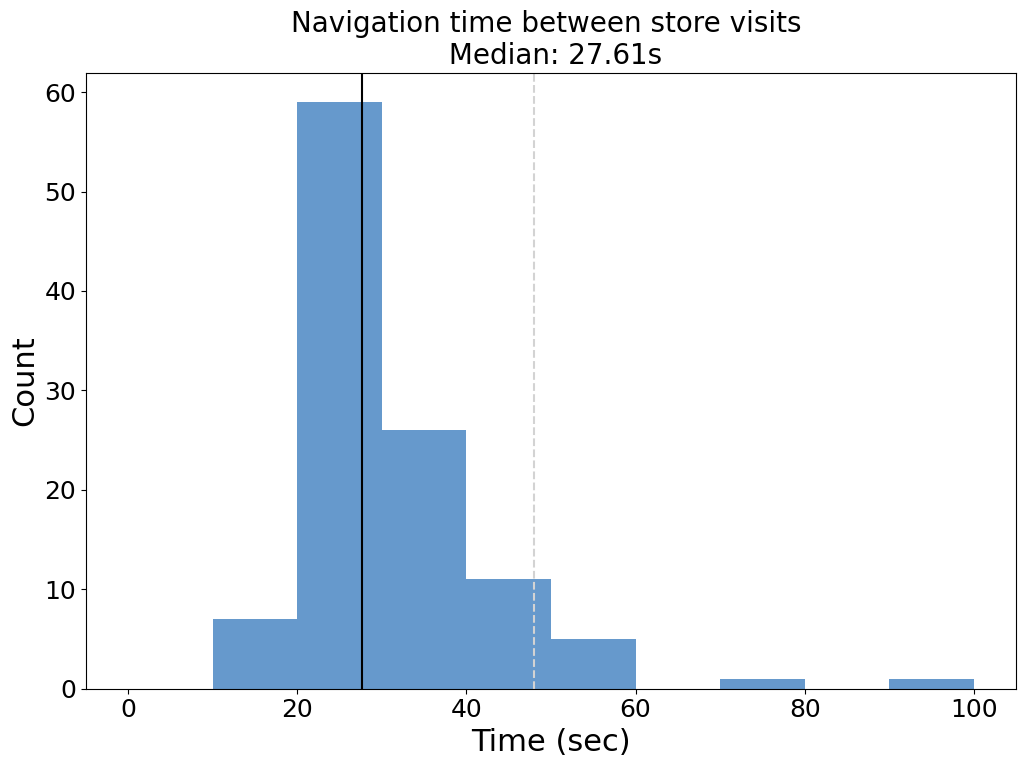

In [27]:
word_evs = full_evs.query('type == "WORD"')
total_delivery_time = []

for trial, trial_evs in word_evs.groupby(["trial","session","subject"]):
    delivery_times = np.diff(trial_evs.mstime) / 1000
    total_delivery_time.extend(delivery_times)

median = np.median(total_delivery_time)
median = float("{0:.2f}".format(median))
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(total_delivery_time, color=(0.4,0.6,0.8), range=(0, 100))
plt.axvline(np.median(total_delivery_time), color="k")
plt.axvline(48, color="lightgrey",linestyle='--')

plt.title("Navigation time between store visits \n Median: {}s".format(median), fontsize=20)
plt.xlabel("Time (sec)", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# ax.spines.top.set_visible(False)
# ax.spines.right.set_visible(False)

plt.savefig(f"{fig_path}/navigation_time_dist.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

# make ticks larger
plt.show()

Histogram of navigation time between each two stores in town.

Prior data shows that in 80% of trials patient reach the next store within 50 sec.
Too long navigation times may indicate that patients paused playing the game or did not understand the instructions.

## Pointing task 


In [28]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.pi/18

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=True, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [29]:
pointing_evs = full_evs[full_evs.type == 'pointing finished']
pointing_evs

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,montage,msoffset,mstime,phase,presX,presZ,protocol,recalled,rectime,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
4,151332,178.375000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633375710,encoding,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.000000,-999.00000,R1620J,61.906250,0,pointing finished
8,180205,307.500000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633404583,encoding,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-3.070312,-58.50000,R1620J,304.000000,0,pointing finished
11,218826,102.375000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633443204,encoding,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-29.562500,-37.25000,R1620J,95.750000,0,pointing finished
14,244267,29.390625,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633468645,encoding,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,32.187500,-60.90625,R1620J,37.750000,0,pointing finished
17,270292,291.000000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633494670,encoding,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,59.281250,-9.15625,R1620J,276.250000,0,pointing finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,3494033,242.500000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654728651021,encoding,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,35.406250,-33.12500,R1620J,228.625000,4,pointing finished
620,3516856,109.500000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654728673844,encoding,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-3.070312,-58.50000,R1620J,118.062500,4,pointing finished
624,3541867,11.726562,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654728698855,encoding,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,14.546875,-58.78125,R1620J,27.828125,4,pointing finished
628,3640344,192.500000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654728797332,encoding,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,36.750000,59.06250,R1620J,189.875000,4,pointing finished


In [33]:
pointing_evs = full_evs[full_evs.type == 'pointing finished']
point_evs = pointing_evs[(pointing_evs['storeX']) != -999.00] # change var name 'filt_point_evs' if you want to plot all trials
# print(len(pointing_evs))
# print(len(filt_point_evs))
point_error_df = pd.DataFrame([])

for i,filt_point_evs in point_evs.groupby(['subject','session']): # to compute within subject. if i want to compute across al trials remove this if statement
#find the raw pointing error for each pointing task completed
    submitted_point = filt_point_evs['submittedPointingDirection'] 
    correct_point = filt_point_evs['correctPointingDirection']
    difference = np.radians(submitted_point - correct_point)
    difference = (difference + np.pi) % (2 * np.pi) - np.pi
    difference = np.array(difference)

    #find the store locations for all stores visited 
    store_evs = full_evs[~pd.isnull(full_evs['storeX'])]
    store_evs = store_evs[~pd.isnull(store_evs['store'])]
    stores = store_evs.groupby('store')  
    stores = stores.agg('mean')[['storeX', 'storeZ']]
    storeX = stores['storeX'].values
    storeZ = stores['storeZ'].values

    pos_angles = []
    correct_point = np.array(correct_point)
    x = 0
    for i, finished_row in filt_point_evs.iterrows():
        position_x, position_z = finished_row[['presX', 'presZ']]
        difference_x = (storeX - position_x)
        difference_z = (storeZ - position_z)
        angle = np.arctan2(difference_z, difference_x) 
        angle = (angle + np.pi) % (2 * np.pi) - np.pi
        angle = np.abs(angle)
        pos_angles.append(np.median(angle - correct_point[x]))
        x = x + 1

    # apply correction of pointing error and wrap again to display nicely
    pos_angles = np.array(pos_angles)
    pos_angles = np.radians(pos_angles)
    point_error = difference/ pos_angles
    point_error = (point_error + np.pi) % (2 * np.pi) - np.pi

    point_error_df = point_error_df.append({'subject':filt_point_evs['subject'].unique()[0],
                                     'session':filt_point_evs['session'].unique()[0],
                                    'pointing_error':np.mean(point_error)},ignore_index=True)
    

Skip this if you want to plot all trials (not averaged within subject)

In [31]:
point_error_df
point_error = point_error_df.groupby('subject').mean() # average across sessions
point_error = point_error['pointing_error']

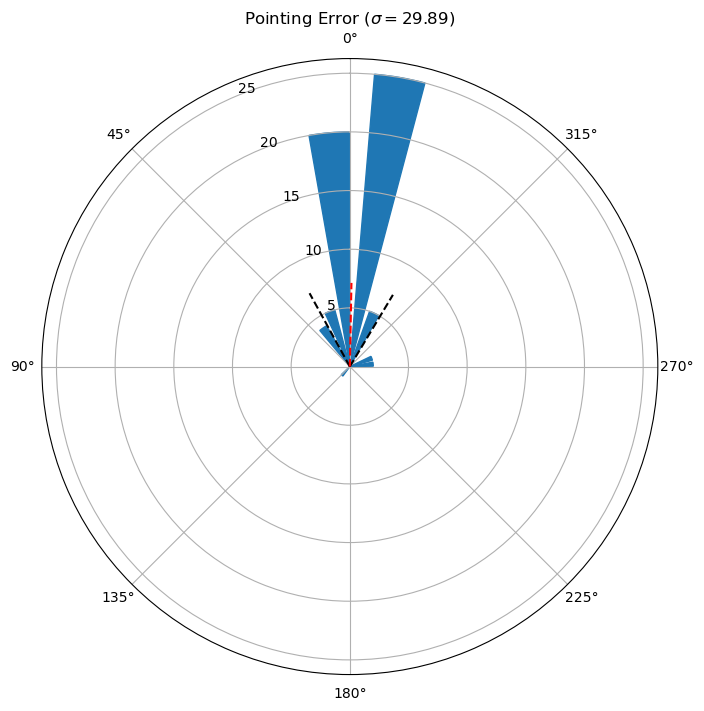

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = 'polar')

# n, bins, _ = circular_hist(ax, point_error, offset = np.pi/2, bins = 8, density = False) #
n, bins, _ = circular_hist(ax, point_error, offset = np.pi/2, density = False) #
plt.title('Pointing Error ($\sigma = {:.2f}$)'.format(point_error.std()*180/np.pi))
# plt.title('Pointing Error ($\mu = {:.2f}$)'.format(point_error.mean()*180/np.pi))

ax.vlines([np.mean(point_error)+point_error.std(), np.mean(point_error)-point_error.std()], ymin = 0, 
          ymax = np.max(point_error.size/np.pi)*0.35, ls = "--", colors = 'k')
ax.vlines(np.mean(point_error), ymin = 0, ymax=np.max(point_error.size/np.pi)*0.35,ls = '--', colors = 'r')

plt.savefig(f"{fig_path}/pointing_dist.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

plt.show()



## Recall Statistics

In [12]:
def add_cued_recalled(events):
    def find_recall(row):
        itemno = row['itemno']
        recalls = events[(events["type"] == 'CUED_REC_WORD') &
                         (events["session"] == row["session"]) &
                         (events["trial"] == row["trial"])]["itemno"].values
        return 1 if itemno in recalls else 0

    events = events.sort_values("mstime")
    events.loc[events["type"] =="WORD", "cuedrecalled"] = events.loc[events["type"] == "WORD"].apply(find_recall, axis=1)
    return events

def add_final_recalled(events):
    def find_recall(row):
        itemno = row['itemno']
        recalls = events[(events["type"] == 'FFR_REC_WORD') &
                         (events["session"] == row["session"])]["itemno"].values
        return 1 if itemno in recalls else 0

    events = events.sort_values("mstime")
    events.loc[events["type"] =="WORD", "finalrecalled"] = events.loc[events["type"] == "WORD"].apply(find_recall, axis=1)
    return events

def get_item_id(item, wordpool=[]):
    if item not in wordpool:
        return -999
    return wordpool.index(item) + 1

with open('/scratch/nicls_cns/dbpool.txt', "r") as f:
    wordpool = [w.strip().upper() for w in f.readlines()]    
    
full_evs['itemno'] = full_evs['item'].transform(get_item_id, wordpool=wordpool)

full_evs = add_cued_recalled(full_evs)
full_evs = add_final_recalled(full_evs)

The below counts only correct responses.

final_item_recall_count = how many items from those encoded in each trial (12) were recalled during the final recall phase.

final_store_recall_count =  how many stores were recalled during final free recall that were indeed visited *across trials*.

total_store_count = number of stores visited across trials.


In [34]:
sub_avg_df = pd.DataFrame([])
word_evs = full_evs.query('type == "WORD"')
for i,sub_dat in word_evs.groupby(['subject','session','trial']):
    total_word_count = len(sub_dat)
    if total_word_count==12: # full trials
        total_recall_count = np.sum(sub_dat.recalled)
        total_cued_recall_count = np.sum(sub_dat.cuedrecalled)
        total_final_recall_count = np.sum(sub_dat.finalrecalled)

        sub=sub_dat["subject"].unique()[0]
        sess=sub_dat["session"].unique()[0]
#         trial=sub_dat["trial"].unique()[0]
        full_sub_evs=full_evs[np.logical_and(full_evs.subject==sub,full_evs.session==sess)]

        total_final_stores = full_sub_evs.store.unique() # visited stores across trials
        visited_temp_stores=total_final_stores.tolist()
        visited_stores = [store.replace(" ", "_").lower() for store in visited_temp_stores]
        visited_stores.remove('-999')
        visited_stores = list(set(visited_stores)) # take unique values
        
#         assert (len(total_final_stores)==12)
        recalled_stores = full_sub_evs.query('type == "SR_REC_WORD"').item.values # Final store recall
        recalled_stores = [store.replace(" ", "_").lower() for store in recalled_stores]
        recalled_stores = list(set(recalled_stores))
        total_store_count = len(visited_stores)
        total_store_recall_count = len([store for store in recalled_stores if store.lower() in total_final_stores])

        sub_avg_df=   sub_avg_df.append({'subject':sub,'trial':sub_dat['trial'].unique()[0],
                                        'session':sess,
                                        'final_store_recall_count':total_store_recall_count,'total_store_count':total_store_count,
                                        'recall_prob':total_recall_count/12,
                                        'cued_recall_prob':total_cued_recall_count/12,
                                        'final_item_recall_prob':total_final_recall_count/12,
                                        'stores_prob':total_store_recall_count/total_store_count},ignore_index=True)     

        data = {"Type":["Immediate", "Cued", "Final Store", "Final Item"], 
                "Recall":[total_recall_count, total_cued_recall_count, total_store_recall_count, total_final_recall_count], 
                "Total":[total_word_count, total_word_count, total_store_count, total_word_count]}
        recall_df = pd.DataFrame(data=data)

In [36]:
sub_avg_df.head(30)

,cued_recall_prob,final_item_recall_prob,final_store_recall_count,recall_prob,session,stores_prob,subject,total_store_count,trial
0,0.666667,0.500000,13.0,0.833333,0.0,0.764706,R1620J,17.0,0.0
1,0.583333,0.666667,13.0,0.833333,0.0,0.764706,R1620J,17.0,1.0
2,0.500000,0.333333,11.0,0.416667,1.0,0.687500,R1620J,16.0,0.0
3,0.666667,0.833333,11.0,1.000000,1.0,0.687500,R1620J,16.0,1.0
4,0.583333,0.500000,11.0,0.750000,1.0,0.687500,R1620J,16.0,2.0
5,0.333333,0.583333,11.0,0.666667,1.0,0.687500,R1620J,16.0,3.0
6,0.500000,0.500000,11.0,0.750000,1.0,0.687500,R1620J,16.0,4.0
7,0.500000,0.416667,14.0,0.333333,2.0,0.823529,R1620J,17.0,0.0
8,0.500000,0.666667,14.0,0.916667,2.0,0.823529,R1620J,17.0,1.0
9,0.583333,0.750000,14.0,0.916667,2.0,0.823529,R1620J,17.0,2.0


average the data across sessions per subject

In [15]:
sub_df=sub_avg_df.groupby('subject').mean()
sub_df=sub_df.melt(value_vars=['cued_recall_prob','recall_prob','stores_prob','final_item_recall_prob'],value_name='recall_prob',var_name='recall_phase')
sub_df.head(20)

,recall_phase,recall_prob
0,cued_recall_prob,0.524510
1,cued_recall_prob,0.472222
2,cued_recall_prob,0.430556
3,cued_recall_prob,0.183333
4,cued_recall_prob,0.466667
5,cued_recall_prob,0.203704
6,cued_recall_prob,0.083333
7,recall_prob,0.392157
8,recall_prob,0.444444
9,recall_prob,0.430556


In [41]:
import seaborn as sns

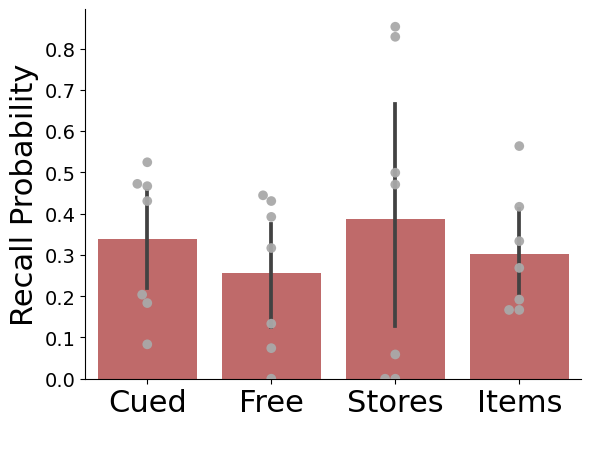

In [16]:
sns.barplot(data=sub_df, x="recall_phase", y="recall_prob",color = 'indianred',alpha = 1) # errors here are 95% CI
sns.swarmplot(data=sub_df, x="recall_phase", y="recall_prob",color='darkgrey',alpha = 0.95,size=7)

plt.xticks([0,1,2,3],['Cued','Free','Stores','Items'],fontsize=22, rotation=0)
plt.yticks(fontsize=14)
# plt.ylim((-0.1,0.1))
# plt.xlabel('Oscillatory Activity',fontsize=22)
plt.xlabel(' ',fontsize=22)
plt.ylabel('Recall Probability',fontsize=22); 
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_color('k')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('k')#plt.box(on=None)
plt.grid(False)

# plt.savefig(f"{fig_path}/correct_recall_prob.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')
plt.show()


- Above recall probabilities were calculated while ignoring any subsequent key presses

## Externalized Free Recall Analysis

In [17]:
# update efr_mark column based on the key presses that happened in between two recall periods
rec_types = ["REC_WORD", "CUED_REC_WORD", "SR_REC_WORD", "FFR_REC_WORD"]

for rec_type in rec_types:
    rec_evs = full_evs.query('type == @rec_type')
    for i, row in rec_evs.reset_index().iterrows():
        if i == len(rec_evs)-1:
            continue

        curr_rec_time = row.mstime
        next_rec_time = rec_evs.iloc[i+1].mstime

        key_press_evs = full_evs.query('@curr_rec_time < mstime < @next_rec_time & type == "EFR_MARK"')
        if len(key_press_evs) > 0:
            full_evs.at[row["index"], "efr_mark"] = 1

In [18]:
# update immediate & cued & final rec events so that they have recalled column properly populated
# LC: make this into a single function call & make it more efficient

rec_evs = full_evs.query('type == "REC_WORD"').reset_index()
for i, row in rec_evs.iterrows():
    curr_trial = row["trial"]
    curr_item = row["item"]
    
    words = full_evs.query('type == "WORD" & trial == @curr_trial').item.values
    if curr_item in words:
        full_evs.at[row["index"], "recalled"] = 1

cued_rec_evs = full_evs.query('type == "CUED_REC_WORD"').reset_index()
for i, row in cued_rec_evs.iterrows():
    curr_trial = row["trial"]
    curr_item = row["item"]
    
    words = full_evs.query('type == "WORD" & trial == @curr_trial').item.values
    if curr_item in words:
        full_evs.at[row["index"], "recalled"] = 1
        
ffr_rec_evs = full_evs.query('type == "FFR_REC_WORD"').reset_index()
for i, row in ffr_rec_evs.iterrows():
    curr_item = row["item"]
    
    all_words = full_evs.query('type == "WORD"').item.values
    if curr_item in all_words:
        full_evs.at[row["index"], "recalled"] = 1

In [60]:
#FREE RECALL
# Correct Rejection : intrusion != 0 and keypress == True
# False Alarm: intrusion == 0 / recalled == 1 and keypress == True
# Miss : intrusion != 0 and keypress == False
# Hit: intrusion == 0 and keypress == False

#CUED RECALL                              #intra-list intrusion
# Correct Rejection : ( intrusion != 0 | (intrusion == 0 and recalled == 0) ) and keypress == True
# False Alarm: recalled == 1 and keypress == True
# Miss : ( intrusion != 0 | (intrusion == 0 and recalled == 0) ) and keypress == False
# Hit: intrusion == 0 and recalled == 1 and keypress == False

intrusion_df = pd.DataFrame(columns=["subject", "session", "trial", "type", "intrusion_type"])

rec_evs = full_evs.query('type == "REC_WORD"')
for i, row in rec_evs.iterrows():
    if row.recalled != 1 and row.efr_mark == 1:
        intrusion_type = "intrusions rejected"
    elif row.recalled == 1 and row.efr_mark == 1:
        intrusion_type = "correct recalls rejected"
    elif row.recalled != 1 and row.efr_mark != 1:
        intrusion_type = "intrusions accepted"
    elif row.recalled == 1 and row.efr_mark != 1:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Free Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)
    
cued_rec_evs = full_evs.query('type == "CUED_REC_WORD"')
for i, row in cued_rec_evs.iterrows():
    if row.recalled != 1 and row.efr_mark == 1:
        intrusion_type = "intrusions rejected"
    elif row.recalled == 1 and row.efr_mark == 1:
        intrusion_type = "correct recalls rejected"
    elif row.recalled != 1 and row.efr_mark != 1:
        intrusion_type = "intrusions accepted"
    elif row.recalled == 1 and row.efr_mark != 1:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Cued Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)
    
ffr_rec_evs = full_evs.query('type == "FFR_REC_WORD"')
for i, row in ffr_rec_evs.iterrows():
    if row.recalled != 1 and row.efr_mark == 1:
        intrusion_type = "intrusions rejected"
    elif row.recalled == 1 and row.efr_mark == 1:
        intrusion_type = "correct recalls rejected"
    elif row.recalled != 1 and row.efr_mark != 1:
        intrusion_type = "intrusions accepted"
    elif row.recalled == 1 and row.efr_mark != 1:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Final Free Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)

    
fsr_rec_evs = full_evs.query('type == "SR_REC_WORD"')    
for i, row in fsr_rec_evs.iterrows():
    if row.recalled != 1 and row.efr_mark == 1:
        intrusion_type = "intrusions rejected"
    elif row.recalled == 1 and row.efr_mark == 1:
        intrusion_type = "correct recalls rejected"
    elif row.recalled != 1 and row.efr_mark != 1:
        intrusion_type = "intrusions accepted"
    elif row.recalled == 1 and row.efr_mark != 1:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"

    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                    "session":row.session,
                                    "trial":row.trial,
                                    "type":"Final Store Recall",
                                    "intrusion_type":intrusion_type
                                   }, ignore_index=True)

            


In [62]:
# for i,temp in intrusion_df.groupby(['subject']):
#     temp
# temp

,subject,session,trial,type,intrusion_type
964,R1663E,0,-999,Final Free Recall,correct recalls accepted
965,R1663E,0,-999,Final Free Recall,correct recalls rejected
966,R1663E,0,-999,Final Free Recall,correct recalls accepted
967,R1663E,0,-999,Final Free Recall,correct recalls rejected
968,R1663E,0,-999,Final Free Recall,correct recalls rejected
969,R1663E,0,-999,Final Free Recall,correct recalls rejected
970,R1663E,0,-999,Final Free Recall,correct recalls rejected
971,R1663E,0,-999,Final Free Recall,intrusions accepted
1136,R1663E,0,-999,Final Store Recall,correct recalls accepted


In [65]:

# intrusion_df = intrusion_df[intrusion_df['trial']!=-999]
table = intrusion_df.groupby(["subject", "session", "type", "intrusion_type"]).size().reset_index(name='counts')
table[10:40]

,subject,type,intrusion_type,counts
10,R1620J,Free Recall,correct recalls accepted,84
11,R1620J,Free Recall,correct recalls rejected,38
12,R1620J,Free Recall,intrusions accepted,4
13,R1620J,Free Recall,intrusions rejected,1
14,R1633J,Cued Recall,correct recalls accepted,12
15,R1633J,Cued Recall,correct recalls rejected,12
16,R1633J,Cued Recall,intrusions accepted,3
17,R1633J,Cued Recall,intrusions rejected,2
18,R1633J,Free Recall,correct recalls accepted,13
19,R1633J,Free Recall,correct recalls rejected,10


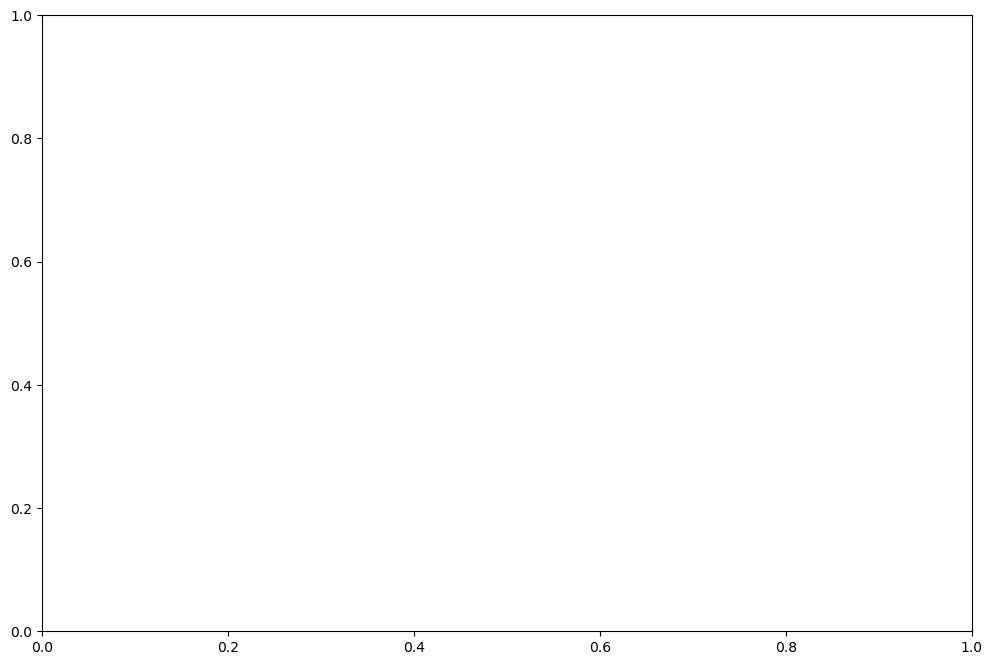

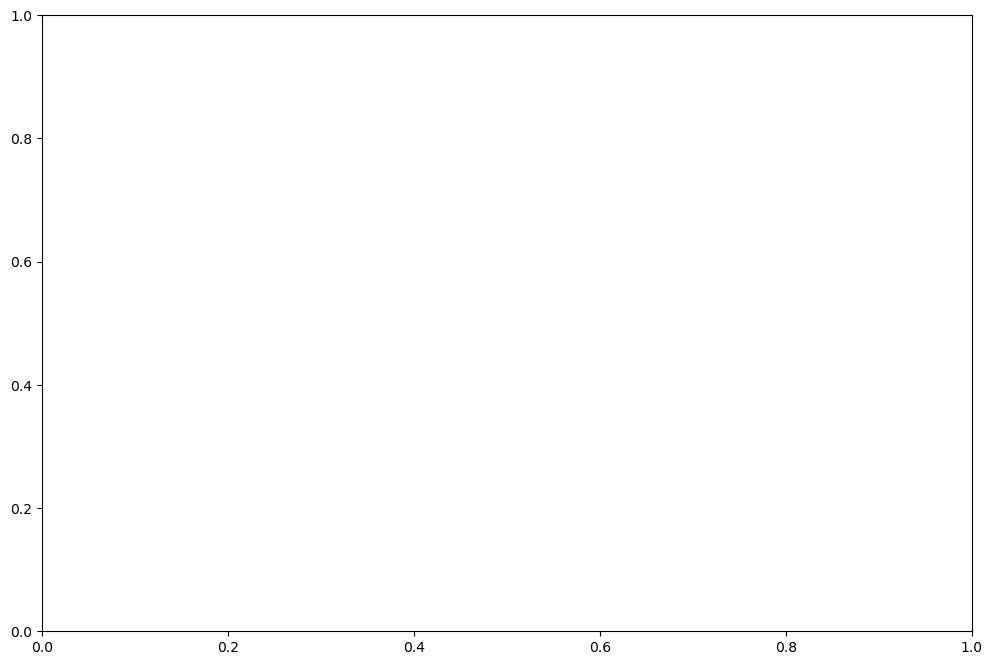

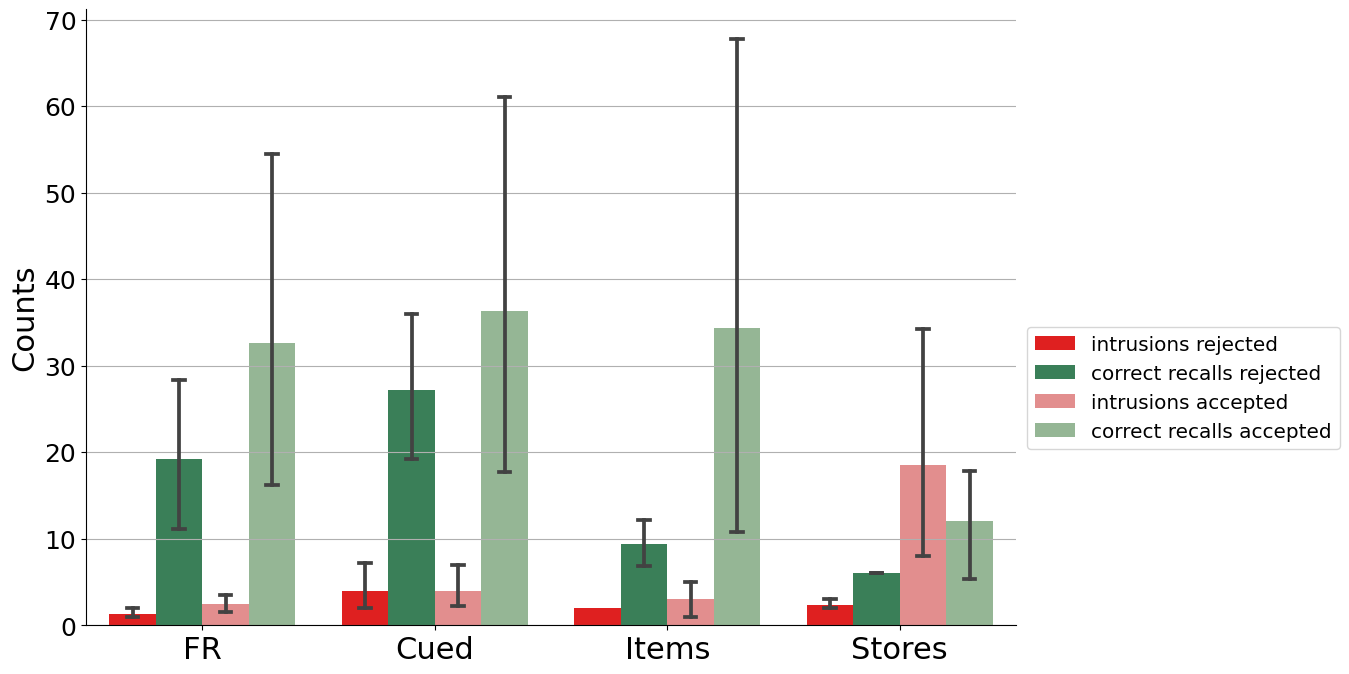

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
cols = ['red','seagreen','lightcoral','darkseagreen']
p = sns.barplot(data=table, 
                x="type", 
                order=["Free Recall", "Cued Recall", "Final Free Recall", "Final Store Recall"],
                y="counts", 
                hue="intrusion_type", 
                hue_order=["intrusions rejected", 
                           "correct recalls rejected", 
                           "intrusions accepted", 
                           "correct recalls accepted"],
#                 palette="crest",
                ci=95,
                capsize=0.05,palette=cols)

plt.xticks(fontsize=22)
plt.yticks(fontsize=18)
plt.xlabel("")
plt.ylabel("Counts", fontsize=22)
plt.gca().legend(fontsize="x-large", bbox_to_anchor=(1.001, 0.5)).set_title('')
ax.yaxis.grid()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.xticks([0,1,2,3],['FR','Cued','Items','Stores'],fontsize=22, rotation=0)

# plt.savefig(f"{fig_path}/EFR_type_count.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

plt.show()

** Note that this is the sum over all delivery days

- Intrusions rejected: Intrusions that were correctly rejected
- Correct recalls rejected: Correct recalls that were incorrectly rejected
- Intrusions accepted: Intrusions that were not rejected
- Correct recalls accepted: Correct recalls that were not rejected

### Plot the mean number of trials per Delivery Day

In [29]:
# table2 = table2[table2['trial']!=-999]


In [69]:
intrusion_df
table2 = intrusion_df.groupby(["subject", "session","trial","type", "intrusion_type"]).size().reset_index(name='counts')
table3=table2.groupby(['type','intrusion_type']).mean('counts')
# table2

In [70]:
table2

,subject,session,trial,type,intrusion_type,counts
0,R1620J,0,-999,Final Free Recall,correct recalls accepted,12
1,R1620J,0,-999,Final Free Recall,correct recalls rejected,4
2,R1620J,0,-999,Final Store Recall,correct recalls accepted,5
3,R1620J,0,-999,Final Store Recall,correct recalls rejected,6
4,R1620J,0,-999,Final Store Recall,intrusions accepted,4
...,...,...,...,...,...,...
291,R1653J,1,4,Free Recall,correct recalls accepted,2
292,R1663E,0,-999,Final Free Recall,correct recalls accepted,2
293,R1663E,0,-999,Final Free Recall,correct recalls rejected,5
294,R1663E,0,-999,Final Free Recall,intrusions accepted,1


In [53]:
table2 #.groupby('subject').mean()
for sub in table2['subject'].unique():
    sub_data=table2[table2['subject']==sub]
sub_data

,subject,session,trial,type,intrusion_type,counts
292,R1663E,0,-999,Final Free Recall,correct recalls accepted,2
293,R1663E,0,-999,Final Free Recall,correct recalls rejected,5
294,R1663E,0,-999,Final Free Recall,intrusions accepted,1
295,R1663E,0,-999,Final Store Recall,correct recalls accepted,1


In [48]:
table4=table2.groupby(['subject','type','intrusion_type']).mean('counts')
table4.head(10)

session       trial  \
subject type               intrusion_type                                   
R1620J  Cued Recall        correct recalls accepted  2.352941    1.823529   
                           correct recalls rejected  2.272727    1.909091   
                           intrusions accepted       1.500000    4.000000   
                           intrusions rejected       3.000000    3.500000   
        Final Free Recall  correct recalls accepted  2.000000 -999.000000   
                           correct recalls rejected  2.000000 -999.000000   
        Final Store Recall correct recalls accepted  2.000000 -999.000000   
                           correct recalls rejected  0.000000 -999.000000   
                           intrusions accepted       2.000000 -999.000000   
                           intrusions rejected       2.500000 -999.000000   

                                                        counts  
subject type               intrusion_type                       
R1620J  Cued Recall        correct recalls accepted   5.294118  
                           correct recalls rejected   2.727273  
                           intrusions accepted        1.500000  
                           intrusions rejected        1.000000  
        Final Free Recall  correct recalls accepted  24.750000  
                           correct recalls rejected   3.000000  
        Final Store Recall correct recalls accepted   4.500000  
                           correct recalls rejected   6.000000  
                           intrusions accepted       10.250000  
                           intrusions rejected        1.000000

In [49]:
fig, ax = plt.subplots(figsize=(12,8))
cols = ['red','seagreen','lightcoral','darkseagreen']
p = sns.barplot(data=table4, 
                x="type", 
                order=["Free Recall", "Cued Recall", "Final Free Recall", "Final Store Recall"],
                y="counts", 
                hue="intrusion_type", 
                hue_order=["intrusions rejected", 
                           "correct recalls rejected", 
                           "intrusions accepted", 
                           "correct recalls accepted"],
#                 palette="crest",
                ci=95,
                capsize=0.05,palette=cols)
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)
plt.xlabel("")
plt.ylabel("Counts", fontsize=22)
plt.gca().legend(fontsize="x-large", bbox_to_anchor=(1.001, 0.5)).set_title('')
ax.yaxis.grid()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.xticks([0,1,2,3],['FR','Cued','Items','Stores'],fontsize=22, rotation=0)

# plt.savefig(f"{fig_path}/EFR_type_count_per_trial_withoutPractice.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

plt.show()

ValueError: Could not interpret input 'type'

## Serial Position Curve

In [56]:
# spc_df.head(30)

NameError: name 'spc_df' is not defined

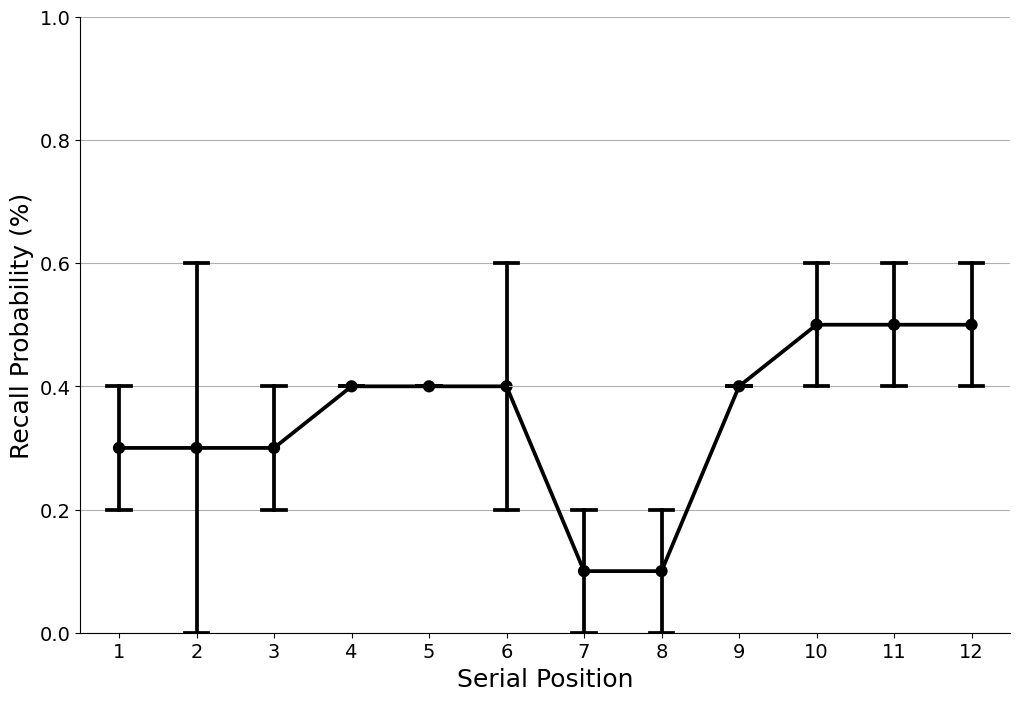

In [58]:
spc_df = full_evs.query("type=='WORD'").groupby(['subject','session', 'serialpos']) \
                                       .agg({'recalled':np.nanmean}).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
spc = sns.pointplot(data=spc_df, x='serialpos', y='recalled', ci=68,
                    color='k', err_style='bars', capsize=.3, label="SPC")

plt.xlabel('Serial Position', fontsize=18)
plt.ylabel('Recall Probability (%)', fontsize=18); plt.ylim([0,1])
ax.yaxis.grid()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(f"{fig_path}/serial_pos_curve.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

plt.show()

## Lag-CRP

In [59]:
full_evs

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,montage,msoffset,mstime,phase,presX,presZ,protocol,recalled,rectime,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type,cuedrecalled
0,6902,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633231280,,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00000,-999,START,NaN
1,6973,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633231351,,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00000,-999,store mappings,NaN
2,117511,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633341889,,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00000,0,TRIAL_START,NaN
3,117710,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633342088,encoding,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pharmacy,-999.0,-999.0,R1620J,-999.00000,0,pointing begins,NaN
4,151332,178.375,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633375710,encoding,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,61.90625,0,pointing finished,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,4707281,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,<>,-999,0,20,1654729864269,,-999,-999,r1,-999,165195,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00000,-999,FFR_REC_WORD_VV,NaN
896,4713016,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654729870004,FFR,-999,-999,r1,-999,-999,-999,4,"{'_remove': 0, 'amplitude': 0.5, 'anode_label'...",-999,-999.0,-999.0,R1620J,-999.00000,4,STIM,NaN
897,4718977,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654729875965,FFR,-999,-999,r1,-999,-999,-999,4,"{'_remove': 0, 'amplitude': 0.5, 'anode_label'...",-999,-999.0,-999.0,R1620J,-999.00000,4,STIM,NaN
898,4721975,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654729878963,FFR,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00000,4,FFR_STOP,NaN


In [60]:
for i,sub_data in full_evs.groupby(['subject','session']):
    sub_data
    print(i)
    temp_data=pb.pd_crp(sub_data,itemno_column='itemno', list_index=['subject', 'session', 'trial'],    lag_num=5)
sub_data

('R1620J', 3)
('R1620J', 4)


,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,montage,msoffset,mstime,phase,presX,presZ,protocol,recalled,rectime,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type,cuedrecalled
0,52245,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654725209233,,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00,-999,START,NaN
1,52323,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654725209311,,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00,-999,store mappings,NaN
3,164607,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654725321595,encoding,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pharmacy,-999.0,-999.0,R1620J,-999.00,0,pointing begins,NaN
2,164607,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654725321595,,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00,0,TRIAL_START,NaN
4,171607,178.375,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654725328595,encoding,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,158.75,0,pointing finished,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,4707281,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,<>,-999,0,20,1654729864269,,-999,-999,r1,-999,165195,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00,-999,FFR_REC_WORD_VV,NaN
896,4713016,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654729870004,FFR,-999,-999,r1,-999,-999,-999,4,"{'_remove': 0, 'amplitude': 0.5, 'anode_label'...",-999,-999.0,-999.0,R1620J,-999.00,4,STIM,NaN
897,4718977,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654729875965,FFR,-999,-999,r1,-999,-999,-999,4,"{'_remove': 0, 'amplitude': 0.5, 'anode_label'...",-999,-999.0,-999.0,R1620J,-999.00,4,STIM,NaN
898,4721975,-999.000,R1620J_EFRCourierOpenLoop_4_08Jun22_1452,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654729878963,FFR,-999,-999,r1,-999,-999,-999,4,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.00,4,FFR_STOP,NaN


In [39]:
# full_evs.query("subject=='R1637T' and session ==0 and type == 'REC_WORD'") 
# sub_data = full_evs.query("subject=='R1637T' and session ==0")
# temp_data=pb.pd_crp(sub_data,itemno_column='itemno', list_index=['subject', 'session', 'trial'],    lag_num=1)                      
# temp_data

TypeError: 'numpy.int64' object is not iterable

In [61]:
full_evs['itemno'] = full_evs['item'].astype('category').cat.codes
crp_df = full_evs.groupby(['subject','session']).apply(
    pb.pd_crp,
    itemno_column='itemno',
    list_index=['subject', 'session', 'trial'],
    lag_num=5).reset_index()

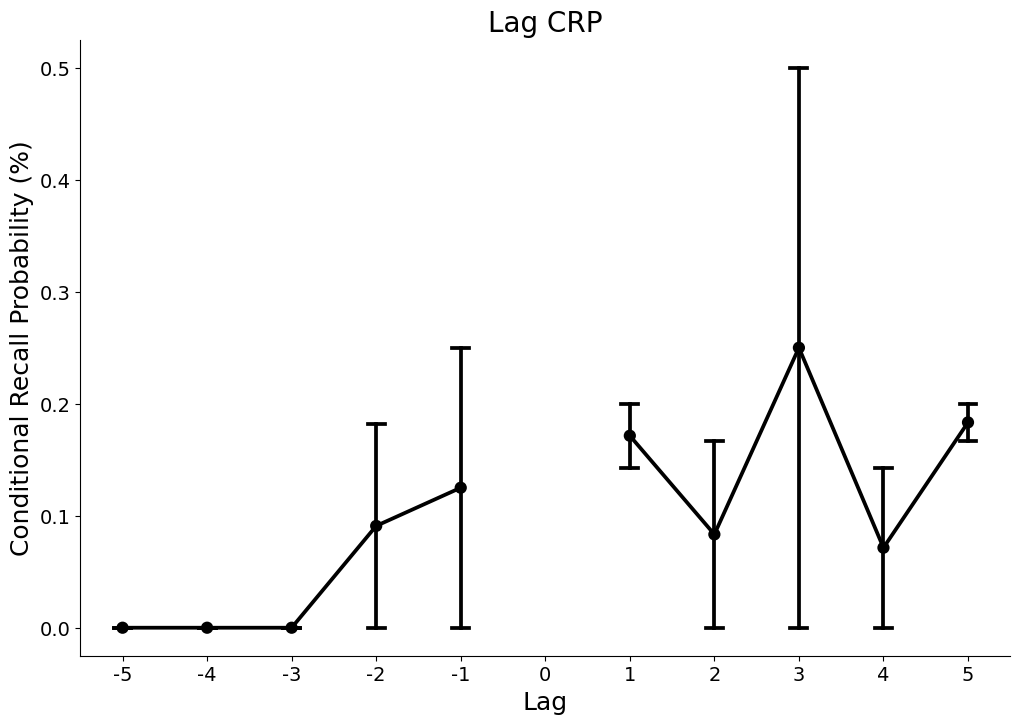

In [62]:
if len(crp_df[~crp_df.prob.isna()]) != 0:
    fig, ax = plt.subplots(figsize=(12,8))
    crp = sns.pointplot(data=crp_df, x='lag', y='prob', ci=68,
                        color='k', err_style='bars', capsize=.2)
    plt.title("Lag CRP", fontsize=20)
    plt.xlabel("Lag", fontsize=18)
    plt.ylabel("Conditional Recall Probability (%)", fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
    plt.savefig(f"{fig_path}/lag_crp.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')
    
    plt.show()
else:
    print("Not available due to poor recall performance")

## Spatial CRP

In [63]:
for i,sub_data in full_evs.groupby(['subject','session']):
    sub_data
    print(i)
    temp_data=pb.pd_sem_crp_list_sub(sub_data,sim_columns=['storeX', 'storeZ'],
                                                  list_index=['subject', 'session', 'trial'], 
                                                  bins=[12.96160383, 41.99123618, 61.53639199, 77.73374529, 97.11224258])
temp_data

('R1620J', 3)
('R1620J', 4)


,sem_bin,actual,poss,prob
0,0,5.0,11.0,0.454545
1,1,3.0,11.0,0.272727
2,2,0.0,12.0,0.000000
3,3,2.0,10.0,0.200000
4,4,2.0,9.0,0.222222


In [64]:
def pd_sem_crp_list(df, sim_columns=None, bins=None, pres_type="WORD", 
               rec_type="REC_WORD", type_column='type', serialpos_col='serialpos', ret_counts=False, p=2):
    """Expects as input a dataframe (df) for one list.
    Doesn't require separate word_vals, expects them to be next to item. 
    Requires bins to be entered from elsewhere"""
    pres_df = df.query(type_column+' == @pres_type').sort_values(serialpos_col)
    pres_itemnos = pres_df[serialpos_col].values[np.newaxis, :]
    rec_itemnos = df.query(type_column+' == @rec_type')[serialpos_col].values[np.newaxis, :]
    recalls = make_recalls_matrix(pres_itemnos, rec_itemnos)

    sem_sims = distance_matrix(pres_df[sim_columns].values, pres_df[sim_columns].values, p=p)
    n_bins = len(bins)

    out = sem_crp(recalls=recalls, 
                       recalls_itemnos=rec_itemnos, 
                       pres_itemnos=pres_itemnos, 
                       subjects=['_'] * recalls.shape[0], 
                       sem_sims=sem_sims, 
                       n_bins=n_bins, 
                       bins=bins,
                       listLength=pres_itemnos.shape[1],
                       ret_counts=ret_counts)
    if ret_counts:
        bin_means, crp, actual, poss = out
    else:
        bin_means, crp = out
    crp_dict = {'prob': crp[0], 
                'sem_bin_mean': bin_means[0],
                'sem_bin': np.arange(n_bins)
               }
    if ret_counts:
        crp_dict['actual'] = actual
        crp_dict['poss'] = poss

    return pd.DataFrame(crp_dict).query('prob == prob')


In [65]:
# list_index=['subject', 'session', 'trial']
# sim_columns=None
# bins=None
# serialpos_col='serialpos'

# sub_sem_crp_df = full_evs.groupby(list_index).apply(pd_sem_crp_list, sim_columns=sim_columns, bins=bins, ret_counts=True, serialpos_col=serialpos_col).reset_index().groupby(
#     sub_index + ['sem_bin']).agg({'actual': 'sum', 'poss': 'sum'}).reset_index()


In [66]:
# # updated version of spatial CRP
# bins = [12.96160383, 41.99123618, 61.53639199, 77.73374529, 97.11224258]

spatial_crp = full_evs.groupby(['subject']).apply(pb.pd_sem_crp_list_sub, sim_columns=['storeX', 'storeZ'],
                                                  list_index=['subject', 'session', 'trial'], 
                                                  bins=[12.96160383, 41.99123618, 61.53639199, 77.73374529, 97.11224258]).reset_index()

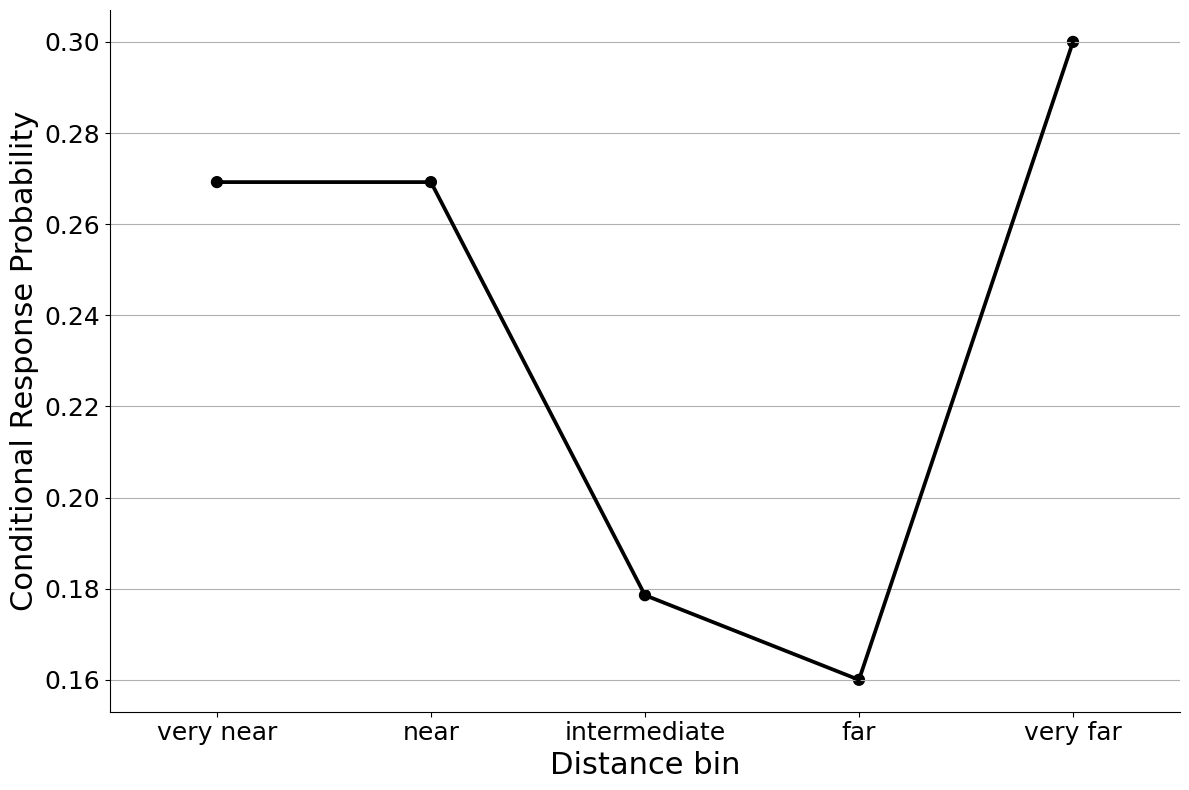

In [67]:
if len(spatial_crp) > 0:
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor('white')
    ax = plt.gca()
    
    ax1 = sns.pointplot(data=spatial_crp, x='sem_bin', y='prob', marker = 'o', color = 'black', capsize = .1, linewidth = 30, ci=68, ax=ax)
    ax.set_xlabel('Lag', fontsize=22)
    ax.set_ylabel('Conditional Response Probability', fontsize=22)
    ax.yaxis.grid()
    ax.tick_params(labelsize=18)
    plt.xlabel('Distance bin')
    plt.ylabel('Conditional Response Probability')
    ax1.set_xticklabels(["very near", "near", "intermediate", "far", "very far"])
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    plt.tight_layout()
else:
    print("Not available due to poor recall performance")
    
plt.savefig(f"{fig_path}/spatial_crp.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')


# Navigation Trajectory

In [68]:
word_evs = full_evs.query('type == "WORD"')
deliv_table = word_evs.groupby(["subject","session"]).agg({"trial":pd.Series.nunique}).reset_index()

In [67]:
# import random
# import os
# import matplotlib.pyplot as plt
# from matplotlib.collections import LineCollection


# for i, row in deliv_table.iterrows():

#     print("{} session {}".format(row.subject, row.session))
#     # pull up jsonl file from data10 directory
#     data_dir = "/data10/RAM/subjects/"
#     file_name = "{}/behavioral/EFRCourierReadOnly/session_{}/session.jsonl".format(row.subject, row.session)
#     file_dir = os.path.join(data_dir, file_name)

#     new_file = []
#     for line in open(file_dir, "r"):
#         # replace this specific entry to empty string
#         if '"point condition":SerialPosition,' in line:
#             line = line.replace('"point condition":SerialPosition,', '')
#         elif '"point condition":SpatialPosition,' in line:
#             line = line.replace('"point condition":SpatialPosition,', '')
#         elif '"point condition":Random,' in line:
#             line = line.replace('"point condition":Random,', '')

#         data_dict = json.loads(line)
#         new_file.append(data_dict)

#     with open("session_tmp.jsonl", "w") as outfile:
#         for line in new_file:
#             json.dump(line, outfile)
#             outfile.write('\n')

#     log = pd.read_json("session_tmp.jsonl", lines=True)
#     log = log[(log.type=='PlayerTransform')|(log.type=='object presentation begins')]

#     def extract_position(row):
#         if row.type=='PlayerTransform':
#             return (row['data']['positionX'], row['data']['positionY'], row['data']['positionZ'])
#         elif row.type=='object presentation begins':
#             return eval(row['data']['player position'])
#         else:
#             return np.nan

#     log['location']=log.apply(extract_position, axis=1)
#     log['trial']=log.apply(lambda row: row['data']['trial number'] if np.isin('trial number', list(row['data'].keys())) else np.nan, axis=1)
#     movements = log.fillna(method='pad').dropna()
#     sess_pos = np.stack(list(map(list, movements.location.values)))

#     group_mov = movements.groupby('trial')    
#     dd_list = np.array(list(group_mov.groups.keys())).astype(int)
#     pos_by_list = [np.stack(list(map(list, group_mov.get_group(i)['location']))) for i in dd_list]

#     fig, ax = plt.subplots(len(dd_list)//2 + len(dd_list)%2, 2, 
#                            figsize= (20, 8*(len(dd_list)//2 + len(dd_list)%2)) )
#     ax = ax.ravel()


#     for i, dd in enumerate(dd_list):
#         store_locs = log['data'][(log.type=='object presentation begins')&(log.trial==dd)].apply(lambda json: eval(json['store position']))
#         store_names = log['data'][(log.type=='object presentation begins')&(log.trial==dd)].apply(lambda json: json['store name'])
#         list_stores = np.stack(list(map(list, store_locs.values)))


#         points = np.array([pos_by_list[i][:, 0], pos_by_list[i][:, 2]]).T.reshape(-1, 1, 2)
#         segments = np.concatenate([points[:-1], points[1:]], axis=1)

#         # don't count motionless time
#         segments = segments[1:][np.any(np.diff(segments, axis=0)!=0, axis=(1, 2))]
#         lc = LineCollection(segments, cmap='copper_r')
#         # Set the values used for colormapping
#         lc.set_array(np.linspace(0, 1, len(segments)))
#         lc.set_linewidth(3); lc.set_alpha(.6)
#         line = ax[i].add_collection(lc)
#         ax[i].scatter(list_stores[:, 0], list_stores[:, 2])
#         texts = []
#         for x, y, name, order in zip(list_stores[:, 0], list_stores[:, 2], store_names, np.arange(len(store_names))):
#             texts.append(ax[i].text(x-10, y+5, name.capitalize() + ' ({})'.format(order)))
#         ax[i].set_title('Delivery Day %d' %(i+1), fontsize=20)
#         ax[i].set_xticklabels([]);ax[i].set_yticklabels([])
#     #         adjust_text(texts, expand_text=(1.2, 1.2))


#         positions = []
#         tmp_texts = []
#         for text in texts:
#     #             print(text.get_position())
#             positions.append(text.get_position())
#             tmp_texts.append(text)

#         point1_1 = (26.700000000000003, 64.1)
#         if point1_1 in positions:
#             text1 = tmp_texts[positions.index(point1_1)]
#             text1.set_visible(False)
#             ax[i].text(26.7, 54.1, text1.get_text())

#         if ((25.1, 31.7) in positions) and ((48.3, 32.9) in positions):
#             text1 = tmp_texts[positions.index((25.1, 31.7))]
#             text2 = tmp_texts[positions.index((48.3, 32.9))]

#             text1.set_visible(False); text2.set_visible(False)

#             ax[i].text(15.1, 31.7, text1.get_text())
#             ax[i].text(52.3, 32.9, text2.get_text())

#         point3_1 = (4.5, -28.700000000000003); point3_2 = (25.4, -28.1); point3_3 = (52.3, -28.5)
#         if (point3_1 in positions) and (point3_2 in positions):

#             if point3_3 in positions:
#                 text1 = tmp_texts[positions.index(point3_1)]
#                 text2 = tmp_texts[positions.index(point3_2)]
#                 text3 = tmp_texts[positions.index(point3_3)]

#                 text1.set_visible(False); text2.set_visible(False); text3.set_visible(False)

#                 ax[i].text(-10, -28.700000000000003, text1.get_text())
#                 ax[i].text(20.4, -28.1, text2.get_text())
#                 ax[i].text(61.3, -28.5, text3.get_text())
#             else:
#                 text1 = tmp_texts[positions.index(point3_1)]
#                 text2 = tmp_texts[positions.index(point3_2)]

#                 text1.set_visible(False); text2.set_visible(False)

#                 ax[i].text(-7, -28.700000000000003, text1.get_text())
#                 ax[i].text(25.4, -28.1, text2.get_text())

#         elif (point3_2 in positions) and (point3_3 in positions):
#             text1 = tmp_texts[positions.index(point3_2)]

#             text1.set_visible(False)

#             ax[i].text(10.4, -28.1, text1.get_text())

#         point4_1 = (-13.1, -53.5); point4_2 = (4.6, -53.8); point4_3 = (22.200000000000003, -55.9)
#         if (point4_1 in positions) and (point4_2 in positions):

#             if point4_3 in positions:
#                 text1 = tmp_texts[positions.index(point4_1)]
#                 text2 = tmp_texts[positions.index(point4_2)]
#                 text3 = tmp_texts[positions.index(point4_3)]

#                 text1.set_visible(False); text2.set_visible(False); text3.set_visible(False)

#                 ax[i].text(-20, -65.5, text1.get_text())
#                 ax[i].text(0, -53.8, text2.get_text())
#                 ax[i].text(30, -55.9, text3.get_text())
#             else:
#                 text1 = tmp_texts[positions.index(point4_1)]
#                 text2 = tmp_texts[positions.index(point4_2)]

#                 text1.set_visible(False); text2.set_visible(False)

#                 ax[i].text(-20, -53.5, text1.get_text())
#                 ax[i].text(5, -53.8, text2.get_text())

#         elif (point4_2 in positions) and (point4_3 in positions):
#             text1 = tmp_texts[positions.index(point3_2)]

#             text1.set_visible(False)

#             ax[i].text(0, -53.8, text1.get_text())


#     fig.subplots_adjust(hspace=0.2, wspace=0.2)
#     plt.tight_layout()
#     cbar = fig.colorbar(line, ax=ax[:], location='right', shrink = 0.7)
#     cbar.ax.tick_params(labelsize=16)
#     cbar.ax.set_yticklabels(["Start", "", "", "", "", "End"])
#     fig.set_facecolor('white')
#     for a in ax:
#         a.axis("off")
#     plt.show()

# iEEG

## SME

CPP total time wavelet loop:  3.1283679008483887


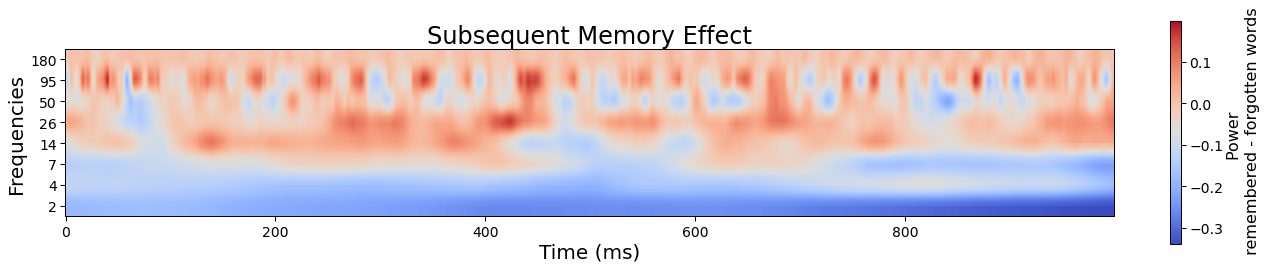

In [33]:
from ptsa.data.filters import MorletWaveletFilter

word_evs = evs[evs.type=='WORD']
contacts = reader.load('contacts')

buf = 500
eeg = reader.load_eeg(word_evs, rel_start=-500 - buf, rel_stop=500 + buf, scheme=contacts)
sr = round(eeg.samplerate)
eeg_ptsa = eeg.to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
eeg_ptsa = eeg_ptsa.filtered([58, 62])
eeg_ptsa = eeg_ptsa.filtered([118, 122])

#Get spectral power
myfreqs = np.logspace(np.log10(2), np.log10(180), 8)  #4-100 Hz, 40 frequencies
# accomodating for different versions of PTSA
try:
    wf = MorletWaveletFilter(timeseries=eeg_ptsa,freqs=myfreqs, width=4, output='power') 
    pow_wavelet = wf.filter()   #output is freqs, events, elecs, and time
except:
    wf = MorletWaveletFilter(freqs=myfreqs, width=4, output='power')
    pow_wavelet = wf.filter(eeg_ptsa)
buff_in_samples=int((buf/1000.)*sr) # convert buffer time to samples
pows = pow_wavelet.isel(time=np.arange(buff_in_samples,len(pow_wavelet.time)-buff_in_samples))  #remove buffer period    
pows = np.log10(pows) # get log of powers. # powes time is 2750 samples, corresponding to 2750/500=5,500ms. # in some versions use:np.log10(pows.data) instead.

mask = word_evs.recalled.astype(bool).values
sme = pows[:, mask].mean(['event', 'channel']) - pows[:, ~mask].mean(['event', 'channel'])

# PLOT
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()
im = ax.imshow(sme, cmap='coolwarm', aspect = 20, interpolation='hamming')
plt.yticks(ticks = range(0, 8), labels=[f"{f:.0f}" for f in np.logspace(np.log10(2), np.log10(180), 8)])
labels = ax.get_xticklabels()
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Frequencies', fontsize=20)
plt.title('Subsequent Memory Effect', fontsize=24)
cbar = plt.colorbar(im, ax=ax, fraction = .01)
cbar.set_label(label='Power \n remembered - forgotten words', size=16)
cbar.ax.tick_params(labelsize=14)
plt.gca().invert_yaxis()
plt.show()